In [130]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import warnings
import pandas as pd
import numpy as np
import requests
import time
import random


warnings.simplefilter(action='ignore', category=FutureWarning)

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Generate Cities List

In [131]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [132]:
columns = ['City','Cloudiness','Country','Date',
        'Humidity','Lat','Lng','Max Temp','Wind Speed']
cityDf = pd.DataFrame(columns=columns)
cityDf

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [133]:
#base url used to access api
baseUrl = "http://api.openweathermap.org/data/2.5/weather?q="

#get random selection of unique values in cities list
cities = set(cities)
ranCities = random.sample(cities, len(cities))

#get data for each city in cities list using api call
count = 1
print ("Begin Data Retieval\n------------------")

for city in ranCities:
    targetUrl = (baseUrl + city + "&units=imperial" + "&appid=" + api_key)
    resp = requests.get(targetUrl).json()
     #if code is 404 skip
    if resp['cod'] == '404':
        print('Could not find city: ' + city.capitalize() + '. Skipping...')
     #is city cannot be found just ignore continue loop
    try:    
        print ("Processing Record " + str(count) + " | " + resp["name"] + 
          '\n' + targetUrl)
    except KeyError:
        continue
    
    
    #add data to a data frame
    cityDf.set_value(count, "City", resp["name"])
    cityDf.set_value(count,"Cloudiness", resp["clouds"]["all"])
    cityDf.set_value(count,"Country", resp["sys"]["country"])
    cityDf.set_value(count,"Date", resp["dt"])
    cityDf.set_value(count,"Humidity", resp["main"]["humidity"])
    cityDf.set_value(count,"Lat", resp["coord"]["lat"])
    cityDf.set_value(count,"Lng", resp["coord"]["lon"])
    cityDf.set_value(count,"Max Temp", resp["main"]["temp_max"])
    cityDf.set_value(count,"Wind Speed", resp["wind"]["speed"])
    #d = {"City": [resp["name"]], "Cloudiness": resp["clouds"]["all"],
    #           "Country":resp["sys"]["country"], "Date":resp["dt"], 
    #            "Humidity":resp["main"]["humidity"], 
    #            "Lat":resp["coord"]["lat"],
    #            "Lng":resp["coord"]["lon"], 
    #            "Max Temp":resp["main"]["temp_max"], 
    #            "Wind Speed":[resp["wind"]["speed"]]}
    count += 1
   

Begin Data Retieval
------------------
Processing Record 1 | Ucluelet
http://api.openweathermap.org/data/2.5/weather?q=ucluelet&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 2 | Nadym
http://api.openweathermap.org/data/2.5/weather?q=nadym&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 3 | Cabra
http://api.openweathermap.org/data/2.5/weather?q=cabra&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 4 | Peabiru
http://api.openweathermap.org/data/2.5/weather?q=peabiru&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 5 | Ixtapa
http://api.openweathermap.org/data/2.5/weather?q=ixtapa&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 6 | Alyangula
http://api.openweathermap.org/data/2.5/weather?q=alyangula&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 7 | La Ronge
http://api.openweathermap.org/data/2.5/weather?q=la ronge&units=imperial&appid=c1335d6c3

Processing Record 57 | Salinopolis
http://api.openweathermap.org/data/2.5/weather?q=salinopolis&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 58 | Kudahuvadhoo
http://api.openweathermap.org/data/2.5/weather?q=kudahuvadhoo&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 59 | Grand Gaube
http://api.openweathermap.org/data/2.5/weather?q=grand gaube&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 60 | Champerico
http://api.openweathermap.org/data/2.5/weather?q=champerico&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 61 | Portales
http://api.openweathermap.org/data/2.5/weather?q=portales&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Could not find city: Mrirt. Skipping...
Processing Record 62 | Sekoma
http://api.openweathermap.org/data/2.5/weather?q=sekoma&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 63 | Tessalit
http://api.openweathermap.org/data/2.5/weath

Processing Record 113 | Chara
http://api.openweathermap.org/data/2.5/weather?q=chara&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 114 | Erzin
http://api.openweathermap.org/data/2.5/weather?q=erzin&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 115 | Lata
http://api.openweathermap.org/data/2.5/weather?q=lata&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 116 | San Cristobal
http://api.openweathermap.org/data/2.5/weather?q=san cristobal&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 117 | Sao Jose da Coroa Grande
http://api.openweathermap.org/data/2.5/weather?q=sao jose da coroa grande&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 118 | Aransas Pass
http://api.openweathermap.org/data/2.5/weather?q=aransas pass&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 119 | Tutoia
http://api.openweathermap.org/data/2.5/weather?q=tutoia&units=imperia

Processing Record 169 | San Policarpo
http://api.openweathermap.org/data/2.5/weather?q=san policarpo&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 170 | Sabha
http://api.openweathermap.org/data/2.5/weather?q=sabha&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 171 | Nurota
http://api.openweathermap.org/data/2.5/weather?q=nurota&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 172 | Pangai
http://api.openweathermap.org/data/2.5/weather?q=pangai&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 173 | Ponta do Sol
http://api.openweathermap.org/data/2.5/weather?q=ponta do sol&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 174 | Oktyabrskiy
http://api.openweathermap.org/data/2.5/weather?q=oktyabrskiy&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 175 | Kavieng
http://api.openweathermap.org/data/2.5/weather?q=kavieng&units=imperial&appid=c1335d6c3b

Processing Record 224 | Lensk
http://api.openweathermap.org/data/2.5/weather?q=lensk&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 225 | Palembang
http://api.openweathermap.org/data/2.5/weather?q=palembang&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 226 | Kichera
http://api.openweathermap.org/data/2.5/weather?q=kichera&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 227 | Naerbo
http://api.openweathermap.org/data/2.5/weather?q=naerbo&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 228 | Komatipoort
http://api.openweathermap.org/data/2.5/weather?q=komatipoort&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 229 | Denizli
http://api.openweathermap.org/data/2.5/weather?q=denizli&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 230 | Rivadavia
http://api.openweathermap.org/data/2.5/weather?q=rivadavia&units=imperial&appid=c1335d6c3b7fc18480ca97

Processing Record 280 | Santa Luzia
http://api.openweathermap.org/data/2.5/weather?q=santa luzia&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 281 | Amot
http://api.openweathermap.org/data/2.5/weather?q=amot&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 282 | Lagoa
http://api.openweathermap.org/data/2.5/weather?q=lagoa&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 283 | Flinders
http://api.openweathermap.org/data/2.5/weather?q=flinders&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 284 | Ustye
http://api.openweathermap.org/data/2.5/weather?q=ustye&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 285 | Bonnyville
http://api.openweathermap.org/data/2.5/weather?q=bonnyville&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 286 | Naberera
http://api.openweathermap.org/data/2.5/weather?q=naberera&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc

Processing Record 335 | Mauguio
http://api.openweathermap.org/data/2.5/weather?q=mauguio&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 336 | Pompeu
http://api.openweathermap.org/data/2.5/weather?q=pompeu&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 337 | La Baule-Escoublac
http://api.openweathermap.org/data/2.5/weather?q=la baule-escoublac&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 338 | Ushtobe
http://api.openweathermap.org/data/2.5/weather?q=ushtobe&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 339 | Cururupu
http://api.openweathermap.org/data/2.5/weather?q=cururupu&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Could not find city: Palabuhanratu. Skipping...
Processing Record 340 | Palmeira das Missoes
http://api.openweathermap.org/data/2.5/weather?q=palmeira das missoes&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Could not find city: Tsihombe. Skipping...
Cou

Processing Record 390 | Longyearbyen
http://api.openweathermap.org/data/2.5/weather?q=longyearbyen&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 391 | Jaguey Grande
http://api.openweathermap.org/data/2.5/weather?q=jaguey grande&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 392 | Srednekolymsk
http://api.openweathermap.org/data/2.5/weather?q=srednekolymsk&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 393 | Tezpur
http://api.openweathermap.org/data/2.5/weather?q=tezpur&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 394 | Prieska
http://api.openweathermap.org/data/2.5/weather?q=prieska&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 395 | Ribeira Grande
http://api.openweathermap.org/data/2.5/weather?q=ribeira grande&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 396 | Oslob
http://api.openweathermap.org/data/2.5/weather?q=oslob&units=imper

Processing Record 444 | Muroto
http://api.openweathermap.org/data/2.5/weather?q=muroto&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 445 | Yellowknife
http://api.openweathermap.org/data/2.5/weather?q=yellowknife&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 446 | Tilichiki
http://api.openweathermap.org/data/2.5/weather?q=tilichiki&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 447 | Camacari
http://api.openweathermap.org/data/2.5/weather?q=camacari&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 448 | Saldanha
http://api.openweathermap.org/data/2.5/weather?q=saldanha&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 449 | Nishihara
http://api.openweathermap.org/data/2.5/weather?q=nishihara&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 450 | Bethel
http://api.openweathermap.org/data/2.5/weather?q=bethel&units=imperial&appid=c1335d6c3b7fc184

Processing Record 500 | Portree
http://api.openweathermap.org/data/2.5/weather?q=portree&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 501 | Northam
http://api.openweathermap.org/data/2.5/weather?q=northam&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 502 | Tura
http://api.openweathermap.org/data/2.5/weather?q=tura&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 503 | Ust-Nera
http://api.openweathermap.org/data/2.5/weather?q=ust-nera&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Could not find city: Perbaungan. Skipping...
Could not find city: Bababe. Skipping...
Processing Record 504 | Plettenberg Bay
http://api.openweathermap.org/data/2.5/weather?q=plettenberg bay&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 505 | Sitka
http://api.openweathermap.org/data/2.5/weather?q=sitka&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 506 | Jalu
http://api.openweat

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [134]:
cityDf.count()

City          550
Cloudiness    550
Country       550
Date          550
Humidity      550
Lat           550
Lng           550
Max Temp      550
Wind Speed    550
dtype: int64

In [135]:
cityDf.to_csv("CitiesDataFrame.csv")

In [146]:
cityDf.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,Ucluelet,88,CA,1547265636,99,48.94,-125.55,42.46,1.92
2,Nadym,32,RU,1547265600,77,65.53,72.51,-17.4,13.44
3,Cabra,0,ES,1547263800,90,37.47,-4.43,32,2.24
4,Peabiru,32,BR,1547265637,84,-23.91,-52.35,73.91,8.3
5,Ixtapa,0,MX,1547264538,88,20.71,-105.21,64.96,1.59


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

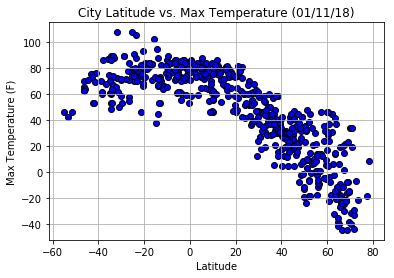

In [147]:
plt.scatter(cityDf["Lat"], cityDf["Max Temp"], marker="o", 
            edgecolors="black", color="blue")

plt.title('City Latitude vs. Max Temperature (01/11/18)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.savefig("CityLatvsTemp.png")

#### Latitude vs. Humidity Plot

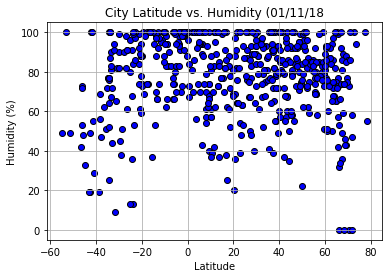

In [148]:
plt.scatter(cityDf["Lat"], cityDf["Humidity"], marker="o", 
            edgecolors="black", color="blue")

plt.title('City Latitude vs. Humidity (01/11/18')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig("CityLatvsHumidity.png")

#### Latitude vs. Cloudiness Plot

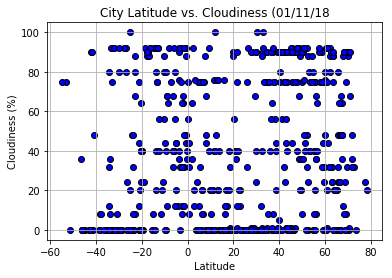

In [149]:
plt.scatter(cityDf["Lat"], cityDf["Cloudiness"], marker="o", 
            edgecolors="black", color="blue")

plt.title('City Latitude vs. Cloudiness (01/11/18')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig("CityLatvsCloudiness.png")

#### Latitude vs. Wind Speed Plot

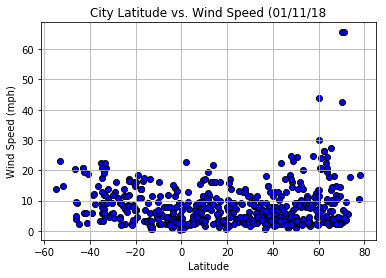

In [150]:
plt.scatter(cityDf["Lat"], cityDf["Wind Speed"], marker="o", 
            edgecolors="black", color="blue")

plt.title('City Latitude vs. Wind Speed (01/11/18')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig("CityLatvsWindSpd.png")